In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

# The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

data = pd.read_csv('full_data.csv')


In [2]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver']]

In [8]:
small_data = small_data[small_data.Vehicle_Type != -1]
small_data = small_data[small_data.Sex_of_Driver != -1]
small_data = small_data[small_data.Sex_of_Driver != 3]

In [9]:
# Count the total plays in each bucket irrespective of bet_cleared or not
countNoZero = small_data.groupby(['Vehicle_Type', 'Sex_of_Driver']).size().reset_index(name='counts')
# Counting the values in each bucket
bucket_full = pd.pivot_table(countNoZero,
                           index=['Vehicle_Type', 'Sex_of_Driver'],
                           values='counts',
                           fill_value = 0,
                           dropna=False,
                           aggfunc=np.sum)

In [10]:
bucket_full

counts
Vehicle_Type Sex_of_Driver         
1            1               155455
             2                36034
2            1                34067
             2                 5639
4            1                26542
             2                 2004
5            1                98922
             2                 4025
8            1                67182
             2                 3640
9            1              1951105
             2              1162829
10           1                12838
             2                 1888
11           1                96163
             2                 6904
16           1                  229
             2                 1342
17           1                 7715
             2                  125
18           1                  288
             2                   43
19           1               175576
             2                 7856
20           1                28123
             2                  751
21           1                82718
             2                  956
22           1                  278
             2                  181
23           1                   17
             2                    4
90           1                22853
             2                 4073
97           1                  250
             2                   16
98           1                  314
             2                   24

From the above stats, the interesting analysis would be in the categories of following vehicles classes

- 9 (Car)
- 16 (Ridden horse)
- 22 (Mobility Scooter)
- 23 (Electric motorcycle)

### Part 1 (Car Analysis Males vs Females)

In [11]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [12]:
car_data = small_data.loc[small_data['Vehicle_Type']==9]

In [13]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

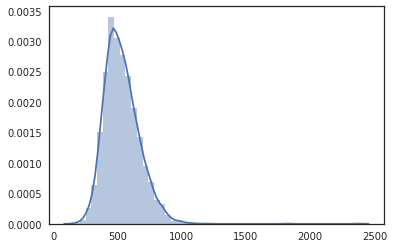

In [14]:
sns.distplot(males_dist)

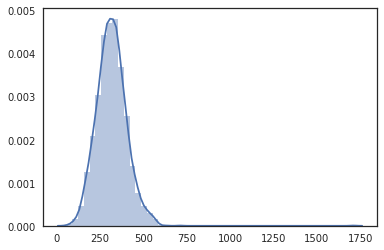

In [15]:
sns.distplot(females_dist)

In [16]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [17]:
z_score = 1.645

In [18]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [19]:
ci_max

482.2753828479668

In [20]:
ci_min

-50.57987353799962

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [22]:
statistic = (mean_females - mean_males)/(np.sqrt(male_var+females_var))
statistic

-1.332705466079735

because the test statistic is less than the z_score, we will accept the Null Hypothesis

p-value = 1

**KS_test**

See if the distribution of males committing accidents is normal with mean 

In [25]:
mean_males

534.2565717415115

In [27]:
np.std(males_dist)

136.60395039690883

In [29]:
stats.kstest((males_dist-mean_males)/np.std(males_dist), 'norm')

KstestResult(statistic=0.05672649896002557, pvalue=1.2404671377327928e-10)

Because the p-value is high, we can say that the distribution of the male accidents with car is normall distributed with Mean = 534.25 and Std deviation = 136.60

**Part 2, ridden horse analysis of Males vs Females**

In [30]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [31]:
car_data = small_data.loc[small_data['Vehicle_Type']==16]

In [32]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

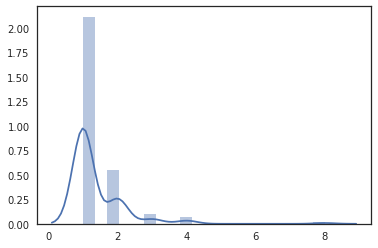

In [33]:
sns.distplot(males_dist)

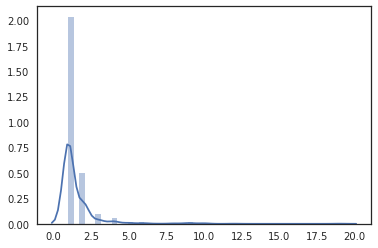

In [34]:
sns.distplot(females_dist)

In [35]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [36]:
z_score = 1.645

In [37]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [38]:
ci_max

2.563564409507868

In [39]:
ci_min

-2.868455205568824

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [40]:
statistic = (mean_females - mean_males)/(np.sqrt(male_var+females_var))
statistic

0.09233128653074493

because the test statistic is less than the z_score, we will accept the Null Hypothesis

In [46]:
p_value = 1-stats.wald.cdf(statistic)
p_value

0.9973927155568206

Since the p value is so high, hence we fail to reject the Null hypothesis. Hence males and females commit equal number of accidents on horse rides.

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [47]:
mean_males

1.3795180722891567

In [48]:
np.std(males_dist)

0.8398592877187037

In [66]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.05183689717925388, pvalue=0.9607661695533488)

As we see that the P-value is very high = 0.96, that means that the samples for Males and Females come from the same distribution.

**Part 3, mobility scooter analysis of Males vs Females**

In [30]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [51]:
car_data = small_data.loc[small_data['Vehicle_Type']==22]

In [52]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

In [53]:
males_dist

[1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2]

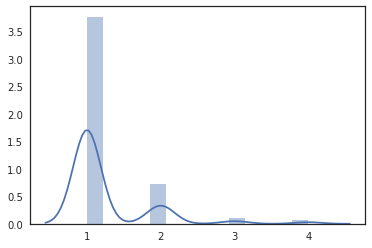

In [55]:
sns.distplot(males_dist)

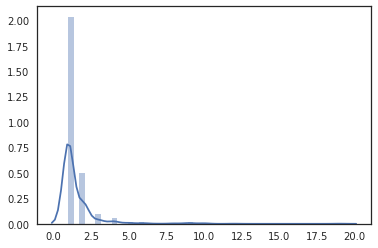

In [34]:
sns.distplot(females_dist)

In [56]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [57]:
z_score = 1.645

In [58]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [59]:
ci_max

1.2074483127569133

In [60]:
ci_min

-1.0310379396904892

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by Males are more than that of females i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{m} > \mu_{f}$

In [64]:
statistic = (mean_males - mean_females)/(np.sqrt(male_var+females_var))
statistic

0.12963897516770048

because the test statistic is less than the z_score, we will accept the Null Hypothesis

In [65]:
p_value = stats.wald.cdf(statistic)
p_value

0.014115073466898092

P value of 0.01 is less tha 0.05, Hence we reject the null hypothesis that Males and Females commit equal number of accidents. 

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [69]:
mean_males

1.2410714285714286

In [70]:
np.std(males_dist)

0.5549378297592976

In [71]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.05183689717925388, pvalue=0.9607661695533488)

P value of 0.96 show that the distribution of Males and Females is the same.

**Part 4, Electric Motorcycle analysis of Males vs Females**

In [72]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [74]:
car_data = small_data.loc[small_data['Vehicle_Type']==23]

In [75]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

In [76]:
males_dist

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

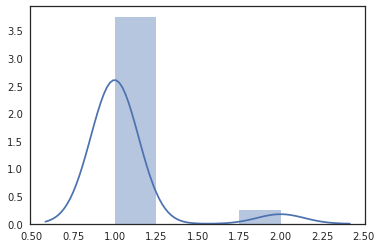

In [77]:
sns.distplot(males_dist)

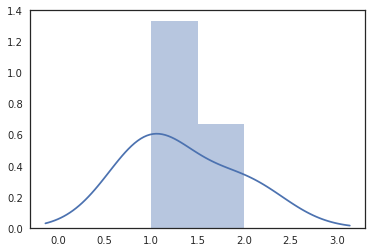

In [78]:
sns.distplot(females_dist)

In [79]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [80]:
z_score = 1.645

In [81]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [82]:
ci_max

0.600886255314667

In [83]:
ci_min

-1.1425529219813335

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** T Test because the sample size is very small**
Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by Males are more than that of females i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{m} > \mu_{f}$

In [92]:
stats.ttest_ind(males_dist, females_dist, equal_var=False)

Ttest_indResult(statistic=-0.7985836518841364, pvalue=0.5034192732426049)

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [89]:
mean_males

1.0625

In [90]:
np.std(males_dist)

0.24206145913796356

In [91]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.27083333333333337, pvalue=0.9744513894909553)

P value of 0.96 show that the distribution of Males and Females is the same.